# NLP-Based GitHub Language Predictor Project

- Predict the tax assessed property value of Zillow Single Family Residential properties with transaction dates in 2017.


# Goal

- Identify drivers of property value.
- Use drivers to develop a machine learning model to predict Single Family Residential property value.

# Imports

In [1]:
# local imports
# import config as c
import acquire as a
import prepare as p
import explore as e
import visual as v
# import model as m

# variable for API TOKEN access
# api_token = c.GITHUB_API_TOKEN

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/marc_aradillas/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Acquire

- Data acquired from GitHub's API using API token and written to a csv file.
- Data initially acquired on 19 Oct, 2023.
- It contained 677 rows and 3 columns before cleaning.
- Each row represents a unique repository for repositories starred more than 200 times and based on robotics projects.
- The columns (repos, readme) represented the label and text associated for each repo.

# Prepare

## Data Preprocessing Steps

### **Replacing Null/NaN Values:**
   - no null values were replaced.

###  **Column Renaming:**
   - renamed reame_contents column to shorten.

###  **Column Removal:**
   - Removed columns that did not contain useful information:
     - Columns with repo names
         - Repo names were used to retrieve text language and text data so it was no longer needed after retrieval.

### **Row Handling:**
   - All rows were revised and html tags, links, and other characters that were not useful were dropped.
   - Decreased feature space from 677 to 609 observation.

### **Data Type Validation:**
   - Checked and ensured that column data types were appropriate.

### **Feature Engineering:**
   - Bigrams, Trigrams as new features

### **Data Splitting:**
   - Split the data into three sets for modeling: training, validation, and test, with an approximate split of 70/15/15.

In [2]:
#
repos_df = a.text_data()

### Quick view of data,

In [3]:
# First 5 rows of data
repos_df.head()

,repo,language,text,bigrams,trigrams
0,AtsushiSakai/PythonRobotics,Python,pythonrobotics githubactionlinuxci githubactio...,path_planning grid_based path_tracking steerin...,pythonroboticsfigure1png_master_atsushisakaipy...
2,NxRLab/ModernRobotics,Python,modern robotics mechanic planning control code...,modern_robotics robotics_mechanic mechanic_pla...,modern_robotics_mechanic robotics_mechanic_pla...
4,onlytailei/CppRobotics,C++,cpprobotics cpp implementation pythonrobotics ...,red_circle black_line steering_control point_r...,speed_steering_control black_line_planned line...
5,JdeRobot/RoboticsAcademy,Other,roboticsacademy learn robotics artificial inte...,learn_robotics mini_radi roboticsacademy_learn...,roboticsacademy_learn_robotics learn_robotics_...
6,pptacher/probabilistic_robotics,C++,probabilisticrobotics working detailed solutio...,probabilistic_robotics victoria_park park_data...,victoria_park_dataset probabilisticrobotics_wo...


### Distribution of Repo Data

In [4]:
# function for data distribution based on target
# dist_of_data(df, 'home_value')

In [5]:
# Counts and ratios of language labels in a DataFrame
counts = e.counts_and_ratios(repos_df, "language")

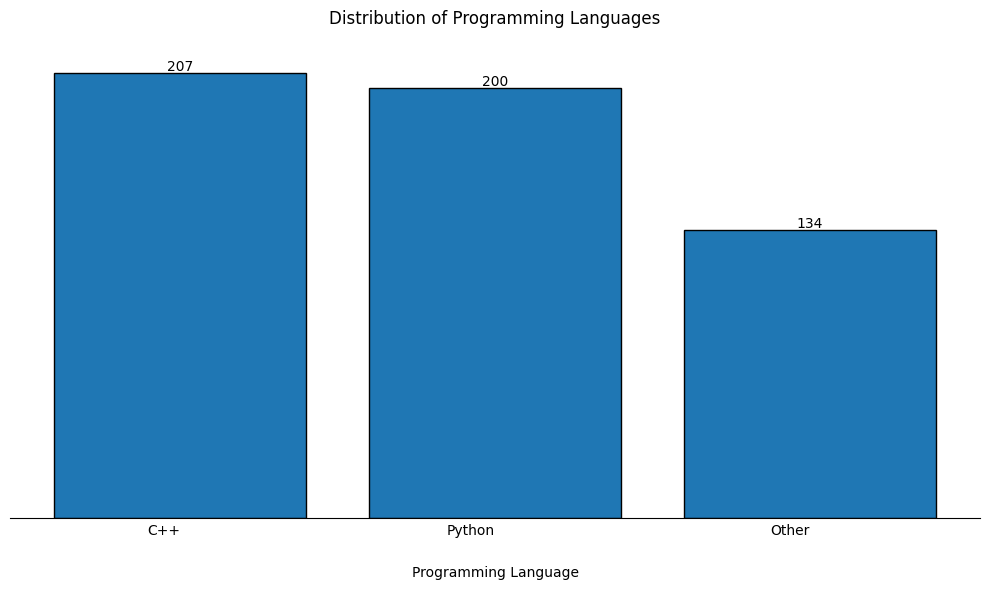

In [6]:
# Counts and ratios of language labels in a DataFrame
counts = e.counts_and_ratios(repos_df, "language")

# Visualize the distribution
v.plot_language_distribution(counts)

# Explore

* Is there an equal proportion of the top ten most common words across all programming languages?
* Are the top 10 reoccurring words in C++ repositories related to C++ language?
* What are the top ten bigrams and trigrams for other programming languages?  
* Does the language feature have a significant reationship to the text data feature?  

In [7]:
# Word frequencies, keeping words as the index
# The word frequencies will be stored in the 'word_counts' variable
word_counts = e.word_counts(repos_df, reset_index=False)

# Question 1. - **Is there an equal proportion of the top 10 most common words across all programming languages?**

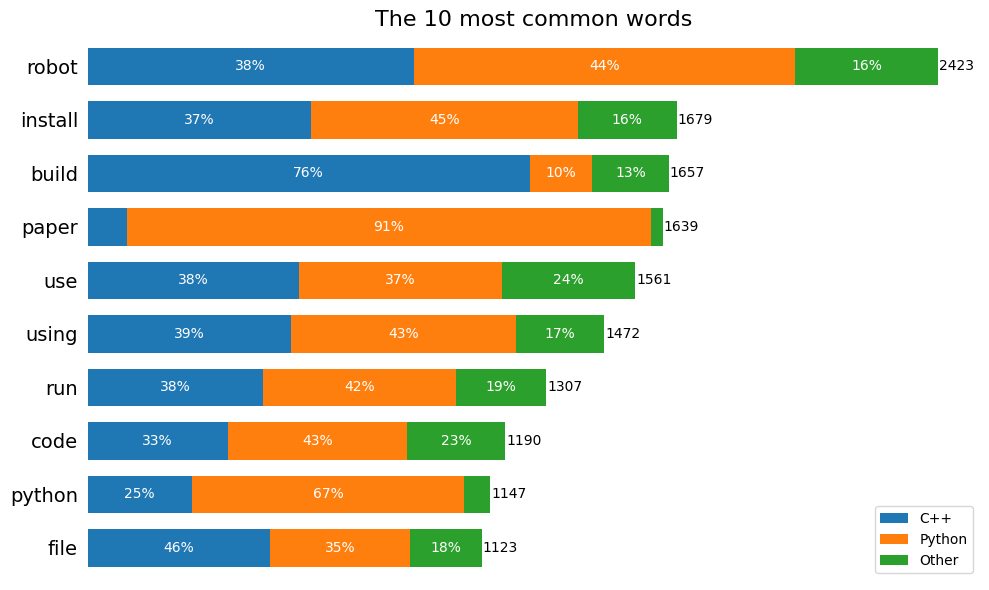

In [8]:
# Plot the top 20 words using a horizontal stacked bar chart
v.plot_top_words(word_counts, column='all', top_n=10, figsize=(10, 6))

# Question 2. - **Are the top ten reoccurring words in C++ repositories related to C++ language?**  

- **Null Hypothesis($H0$):** There is **no significant relationship** between the top 10 words in C++ repositories and C++ language

- **Alternative Hypothesis($Ha$):** There **is a significant correlation** between the top 10 words in C++ repositories and C++ language 

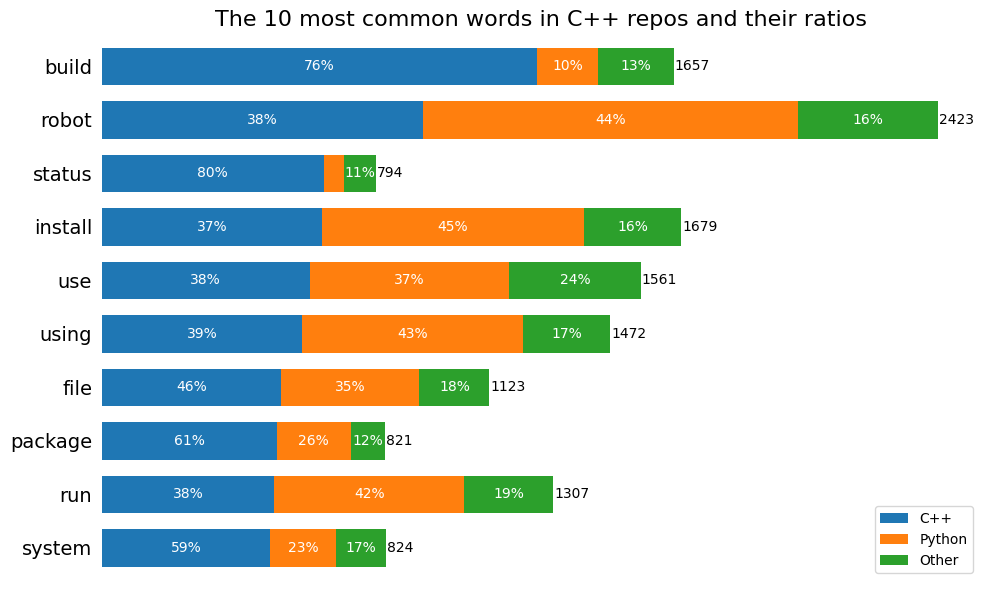

In [9]:
# Plot the top 20 words for C++ using a horizontal stacked bar chart
v.plot_top_words(word_counts, column='C++', top_n=10, figsize=(10, 6), title= 'The 10 most common words in C++ repos and their ratios')

## Stats Test:

In [10]:
cpp_index = word_counts[word_counts.index == 'c++'].index
cpp_index

Index([], dtype='object')

In [11]:
def ttest_churn_vs_tenure(df):
    
    cpp = df.index[df.index == 'c++']

    t_statistic, p_value = stats.ttest_ind(churned_tenure, non_churned_tenure)

    print("T-Statistic:", t_statistic)
    print("P-Value:", format(p_value, '.4f'))
    print()

    if p_value < 0.05:
        print("There is a significant relationship between tenure and churn.")
    else:
        print("There is no significant relationship between tenure and churn.")

Hypothesis:
Alternate: 

# Question 3. - **What are the top ten bigrams and trigrams for other programming languages?**

In [12]:
# analysis 3 visualization
# function 

### **Takeaway:**  
### Findings.

# Question 4. - **Does the language feature have a significant reationship to the text data feature?**

- **Null Hypothesis($H0$):** There is **a significant correlation** between the 

- **Alternative Hypothesis($Ha$):** There **is no significant correlation** between 

In [13]:
# analysis 2 visualization
# analysis_2(train)

### **Takeaway:**  
### Findings

In [14]:
# Analysis 3 visualization
# analysis_3(train)

### **Takeaway:** 
### The stats test Rejected the Null Hypothesis and we can draw our conclusions that there is a strong linear correlation between property area and home value

# Explore Summary

- The words have a fairly equal distribution for each programming language.
- There is heavy use of C++ and Python in robotics related repositories on github that are most frequently starred.
- 

# Features for modeling

### **Features that will be used:**
* *Language*(target)  
* *text*

# Modeling

### Evaluation Metric
- The primary evaluation metrics for the models are:
  - Accuracy

### Data Expansion
- Given more time, additional data could be gathered to improve model performance.
- Experimentation with hyperparameter configurations can lead to better significance and lower RMSE.

### Target Feature
- The target feature for the models is `Language`.

### Baseline accuracy
- The baseline accuracy is 39%.

### Models and Hyperparameters
- Two different sets of hyperparameters will be used for model development, each optimized for different features:
  1. Logistic Regression (default)
  2. RandomForestClassifier (default)
  3. XGBoostClassifier ()

### Model Evaluation
- Models will be developed and evaluated on the training and test datasets.

### Final Model Selection
- The best-performing model, as determined by Accuracy score on the test set, will be selected.

### Test Dataset
- The selected best model will be evaluated on the test dataset for final performance assessment.ized and easier to understand.


## Baseline Model Root Mean Squared Error

In [15]:
# baseline and model rmse and residual plot visual
# wrangle_zillow_and_train_model()

## Best of 3 model configurations

###  selectkbest used for feature importance selection

In [16]:
# selected_features = select_k_features(train)
# selected_features.to_list()

### Used in model Evaluation and they did not offer promising results.

In [17]:
# X_train, y_train, X_val, y_val, X_test, y_test = model_xy()

## Model 1

In [18]:
### RandomForestRegression Model - The RandomForestRegression model showed signs of overfitting, as it performed well on the training data but had a large margin of error.
# model1_results = model_1(X_train, y_train, X_val, y_val)

## Model 2

In [19]:
### XGBRegressor Model - hyperparameter tuning (combination of early round stopping and eval set)
# model2_results = model_2(train, 'home_value', X_val, y_val, params=None)

## Model 3

In [20]:
### Polynomial Features LinearRegression Model - The Polynomial Features LinearRegression model exhibited better generalization, but it had poor R2 scores.
# model_3 = model_3()

## Best on Test

#### XGboost, XGBRegressor algorithm combination of early stopping rounds and eval set.

In [21]:
# final assessment on test data using XGBRegressor model
# final_results = final_model(train, 'home_value', X_test, y_test, params=None)

# Model Summary

### RandomForestRegression Model
- The RandomForestRegression model showed signs of overfitting, as it performed well on the training data but had a large margin of error.
  
### Polynomial Features LinearRegression Model
- The Polynomial Features LinearRegression model exhibited better generalization, but it had poor R2 scores.

### XGBRegressor Model
- The XGBRegressor model, with hyperparameter tuning, performed the best with the following metrics:

  - RMSE: $325,000
  - R2 Score: 0.81

# Conclusion

## Takeaways and Key Findings

- Home details such as the calculated area of the home, lot area, number of bedrooms, number of bathrooms, and year built are significant drivers of home value.
- Calculated area is the most important feature across all factors.
- Higher-priced and larger single residential family properties appear to be concentrated in Ventura County, while smaller homes are spread across Orange and Los Angeles counties.
- Larger living areas correlate with higher property values.
- Location plays a crucial role in property value.


## Model Improvement
- The model still requires further improvement.

# Recommendations and Next Steps

- If the data contained detailed of hard appliances attached or amenities homebuyers seek in single family residential properties maybe this could affect property value.

- Given more time, the following actions could be considered:
  - Gather more data to improve model performance.
  - Feature engineer new variables to enhance model understanding.
      - trasnaction dates for value over time
  - Fine-tune model parameters for better performance.